# IMPORTING LIBRARIES

In [174]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KernelDensity

# GETTING INSIGHTS

In [68]:
df=pd.read_csv("final_dataset.csv")

In [69]:
df.shape

(855969, 25)

<Axes: >

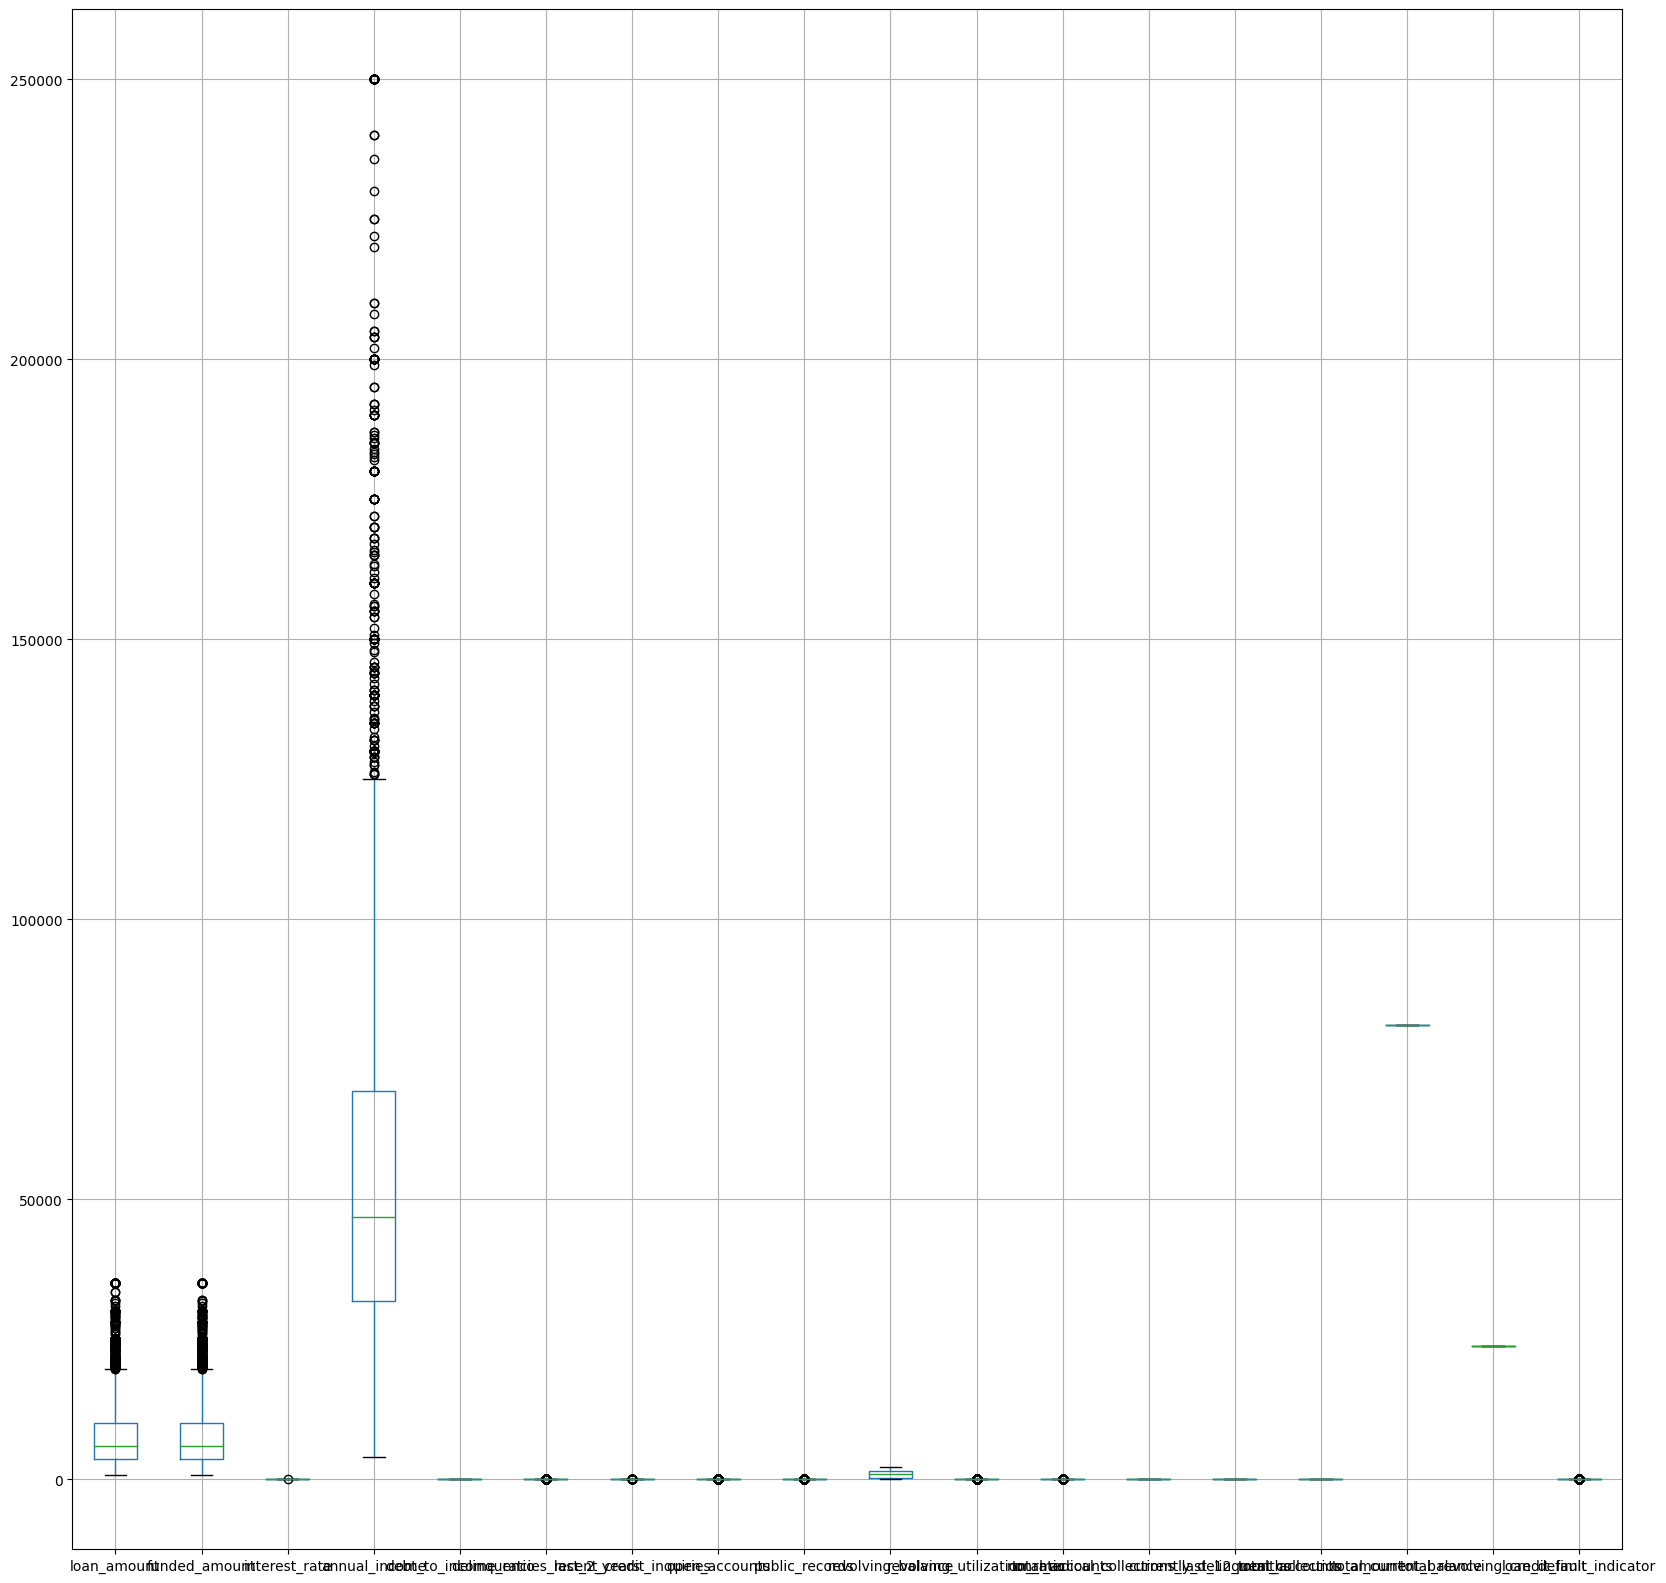

In [88]:
plt.figure(figsize=(20,20))
df.boxplot()

In [89]:
df

,loan_amount,funded_amount,loan_term,interest_rate,loan_grade,loan_sub_grade,employment_length,home_ownership_status,annual_income,income_verification_status,...,public_records,revolving_balance,revolving_utilization_ratio,total_accounts,non_medical_collections_last_12_months,currently_delinquent_accounts,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_default_indicator
1,2500,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,...,0.0,1687.0,9.40,4.0,0.0,0.0,0.0,81008.5,23800.0,1.0
18,6000,6000,36 months,11.71,B,B3,1 year,MORTGAGE,84000.0,Verified,...,0.0,0.0,37.73,14.0,0.0,0.0,0.0,81008.5,23800.0,0.0
33,5000,5000,36 months,8.90,A,A5,2 years,RENT,24044.0,Verified,...,0.0,2224.0,29.30,16.0,0.0,0.0,0.0,81008.5,23800.0,0.0
45,14000,14000,36 months,9.91,B,B1,6 years,RENT,80000.0,Not Verified,...,0.0,2219.0,13.40,40.0,0.0,0.0,0.0,81008.5,23800.0,0.0
78,15000,15000,36 months,7.90,A,A4,1 year,MORTGAGE,52000.0,Not Verified,...,0.0,1616.0,6.70,29.0,0.0,0.0,0.0,81008.5,23800.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38951,7500,7500,36 months,8.00,A,A3,2 years,RENT,40000.0,Not Verified,...,0.0,0.0,0.00,25.0,0.0,0.0,0.0,81008.5,23800.0,0.0
38955,10000,10000,36 months,10.39,B,B4,5 years,MORTGAGE,65379.0,Not Verified,...,0.0,0.0,0.00,33.0,0.0,0.0,0.0,81008.5,23800.0,0.0
38956,2800,2800,36 months,8.00,A,A3,5 years,RENT,14800.0,Not Verified,...,0.0,1946.0,6.50,25.0,0.0,0.0,0.0,81008.5,23800.0,0.0
38960,3600,3600,36 months,11.34,C,C2,10+ years,MORTGAGE,55000.0,Not Verified,...,0.0,623.0,31.10,13.0,0.0,0.0,0.0,81008.5,23800.0,0.0


## REMOVAL OF OUTLIERS

In [91]:
Q1 = df['loan_amount'].quantile(0.25)
Q3 = df['loan_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

print("Lower threshold:", lower_threshold)
print("Upper threshold:", upper_threshold)
print("Mean threshold:",(lower_threshold+upper_threshold)/2)

Lower threshold: -6000.0
Upper threshold: 19600.0
Mean threshold: 6800.0


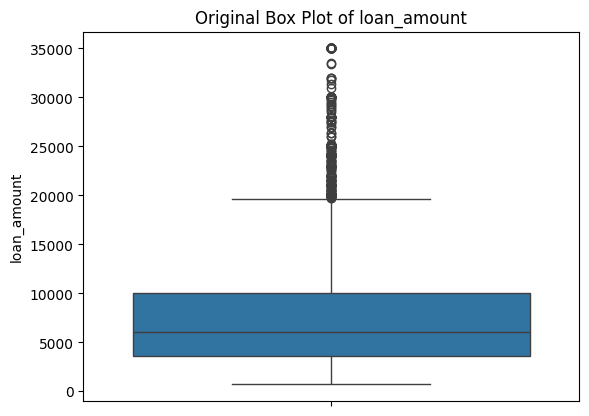

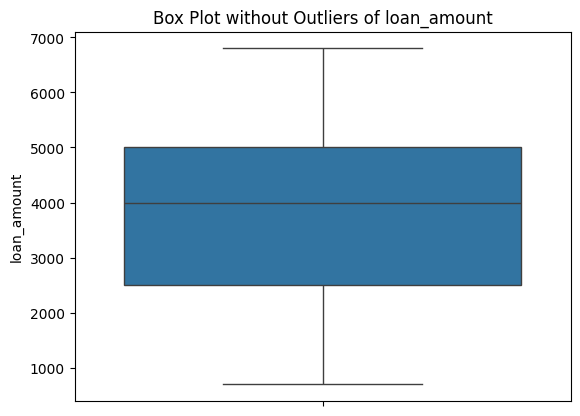

In [92]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 6800

df = removal_box_plot(df,'loan_amount', threshold_value)

In [97]:
Q1 = df['annual_income'].quantile(0.25)
Q3 = df['annual_income'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

print("Lower threshold:", lower_threshold)
print("Upper threshold:", upper_threshold)
print("Mean threshold:",(lower_threshold+upper_threshold)/2)

Lower threshold: -16497.0
Upper threshold: 97895.0
Mean threshold: 40699.0


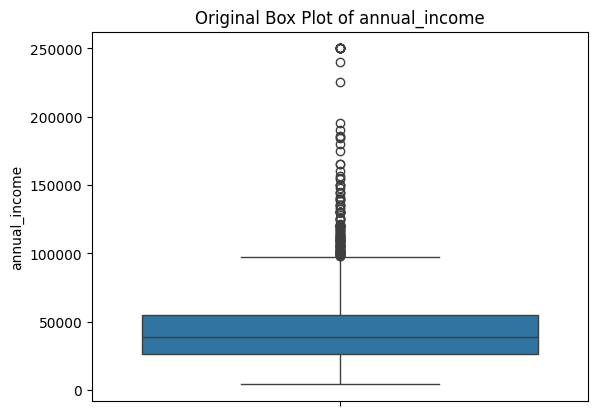

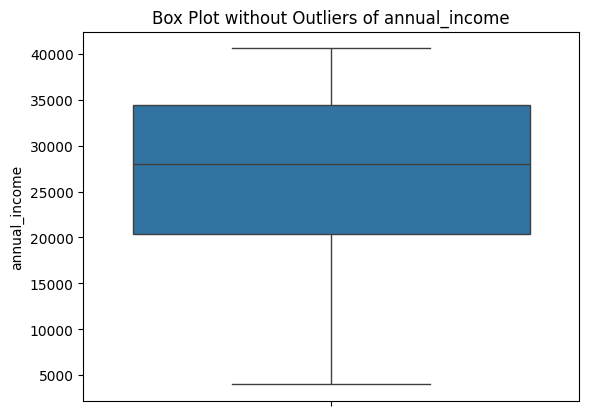

In [98]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 40699.0
df = removal_box_plot(df,'annual_income', threshold_value)

<Axes: >

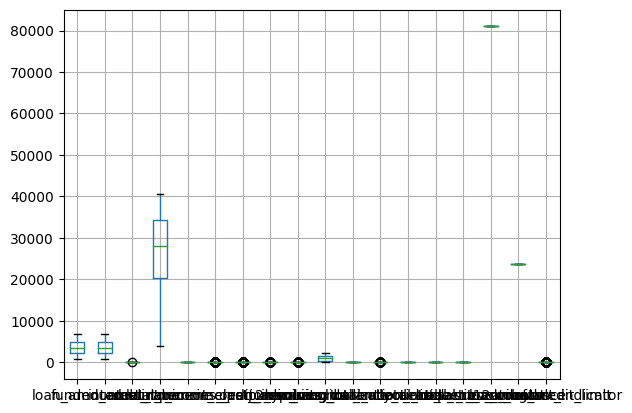

In [99]:
df.boxplot()

## ONE-HOT ENCODING AND LABELING CERTAIN COLUMNS

In [100]:
df2=df.copy()
df2

,loan_amount,funded_amount,loan_term,interest_rate,loan_grade,loan_sub_grade,employment_length,home_ownership_status,annual_income,income_verification_status,...,public_records,revolving_balance,revolving_utilization_ratio,total_accounts,non_medical_collections_last_12_months,currently_delinquent_accounts,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_default_indicator
1,2500,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,...,0.0,1687.0,9.4,4.0,0.0,0.0,0.0,81008.5,23800.0,1.0
33,5000,5000,36 months,8.90,A,A5,2 years,RENT,24044.0,Verified,...,0.0,2224.0,29.3,16.0,0.0,0.0,0.0,81008.5,23800.0,0.0
269,1400,1400,36 months,7.90,A,A4,1 year,RENT,28800.0,Not Verified,...,0.0,2016.0,9.9,7.0,0.0,0.0,0.0,81008.5,23800.0,0.0
275,1800,1800,36 months,6.62,A,A2,10+ years,RENT,18000.0,Not Verified,...,0.0,1792.0,39.8,12.0,0.0,0.0,0.0,81008.5,23800.0,0.0
388,6000,6000,60 months,7.90,A,A4,< 1 year,RENT,30084.0,Verified,...,0.0,2192.0,10.0,15.0,0.0,0.0,0.0,81008.5,23800.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38888,1500,1500,36 months,12.29,C,C5,5 years,MORTGAGE,29000.0,Not Verified,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,81008.5,23800.0,0.0
38926,1600,1600,36 months,11.03,C,C1,2 years,RENT,37500.0,Not Verified,...,0.0,0.0,55.9,15.0,0.0,0.0,0.0,81008.5,23800.0,0.0
38947,3000,3000,36 months,11.34,C,C2,< 1 year,RENT,37440.0,Not Verified,...,0.0,0.0,55.9,14.0,0.0,0.0,0.0,81008.5,23800.0,1.0
38956,2800,2800,36 months,8.00,A,A3,5 years,RENT,14800.0,Not Verified,...,0.0,1946.0,6.5,25.0,0.0,0.0,0.0,81008.5,23800.0,0.0


In [104]:
le = LabelEncoder()
df2['loan_grade'] = le.fit_transform(df2['loan_grade'])
df2['loan_sub_grade'] = le.fit_transform(df2['loan_sub_grade'])


In [106]:
df2 = pd.get_dummies(df2, columns=['home_ownership_status', 'income_verification_status'], drop_first=True)

In [116]:
df2

,loan_amount,funded_amount,loan_term,interest_rate,loan_grade,loan_sub_grade,employment_length,annual_income,debt_to_income_ratio,delinquencies_last_2_years,...,currently_delinquent_accounts,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_default_indicator,home_ownership_status_OTHER,home_ownership_status_OWN,home_ownership_status_RENT,income_verification_status_Source Verified,income_verification_status_Verified
1,2500,2500,60 months,15.27,2,13,< 1 year,30000.0,1.00,0.0,...,0.0,0.0,81008.5,23800.0,1.0,False,False,True,True,False
33,5000,5000,36 months,8.90,0,4,2 years,24044.0,11.93,0.0,...,0.0,0.0,81008.5,23800.0,0.0,False,False,True,False,True
269,1400,1400,36 months,7.90,0,3,1 year,28800.0,10.00,0.0,...,0.0,0.0,81008.5,23800.0,0.0,False,False,True,False,False
275,1800,1800,36 months,6.62,0,1,10+ years,18000.0,23.80,0.0,...,0.0,0.0,81008.5,23800.0,0.0,False,False,True,False,False
388,6000,6000,60 months,7.90,0,3,< 1 year,30084.0,1.68,0.0,...,0.0,0.0,81008.5,23800.0,1.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38888,1500,1500,36 months,12.29,2,14,5 years,29000.0,4.18,0.0,...,0.0,0.0,81008.5,23800.0,0.0,False,False,False,False,False
38926,1600,1600,36 months,11.03,2,10,2 years,37500.0,15.84,0.0,...,0.0,0.0,81008.5,23800.0,0.0,False,False,True,False,False
38947,3000,3000,36 months,11.34,2,11,< 1 year,37440.0,7.72,0.0,...,0.0,0.0,81008.5,23800.0,1.0,False,False,True,False,False
38956,2800,2800,36 months,8.00,0,2,5 years,14800.0,5.48,0.0,...,0.0,0.0,81008.5,23800.0,0.0,False,False,True,False,False


In [132]:
df2['credit_history_length'] = pd.to_datetime(df2['credit_history_length'])
df2['credit_history_length'] = df2['credit_history_length'].dt.year

In [117]:
df2.columns

Index(['loan_amount', 'funded_amount', 'loan_term', 'interest_rate',
       'loan_grade', 'loan_sub_grade', 'employment_length', 'annual_income',
       'debt_to_income_ratio', 'delinquencies_last_2_years',
       'credit_history_length', 'recent_credit_inquiries', 'open_accounts',
       'public_records', 'revolving_balance', 'revolving_utilization_ratio',
       'total_accounts', 'non_medical_collections_last_12_months',
       'currently_delinquent_accounts', 'total_collection_amount',
       'total_current_balance', 'total_revolving_credit_limit',
       'loan_default_indicator', 'home_ownership_status_OTHER',
       'home_ownership_status_OWN', 'home_ownership_status_RENT',
       'income_verification_status_Source Verified',
       'income_verification_status_Verified'],
      dtype='object')

In [125]:
df.columns

Index(['loan_amount', 'funded_amount', 'loan_term', 'interest_rate',
       'loan_grade', 'loan_sub_grade', 'employment_length',
       'home_ownership_status', 'annual_income', 'income_verification_status',
       'debt_to_income_ratio', 'delinquencies_last_2_years',
       'credit_history_length', 'recent_credit_inquiries', 'open_accounts',
       'public_records', 'revolving_balance', 'revolving_utilization_ratio',
       'total_accounts', 'non_medical_collections_last_12_months',
       'currently_delinquent_accounts', 'total_collection_amount',
       'total_current_balance', 'total_revolving_credit_limit',
       'loan_default_indicator'],
      dtype='object')

# MODELS FOR PREDICTING DEFAULTERS

## DESCISION TREE MODEL

Accuracy: 0.7164556962025317


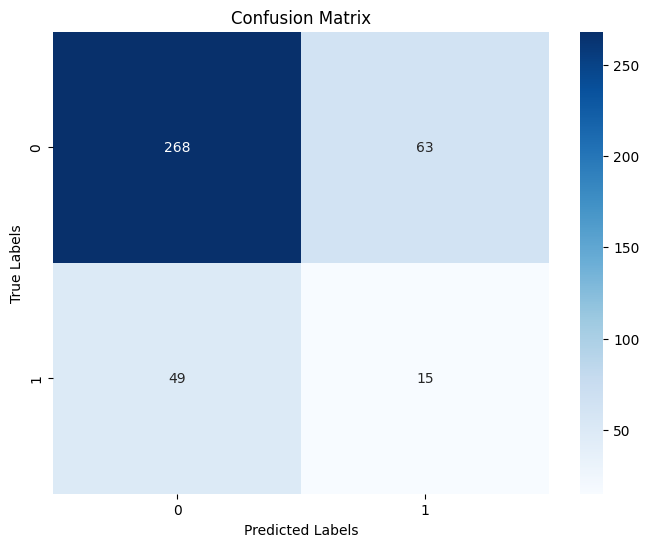

In [134]:
X = df2.drop('loan_default_indicator', axis=1)
y = df2['loan_default_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       331
           1       0.19      0.23      0.21        64

    accuracy                           0.72       395
   macro avg       0.52      0.52      0.52       395
weighted avg       0.74      0.72      0.73       395



## RANDOM FOREST MODEL

Accuracy: 0.8329113924050633


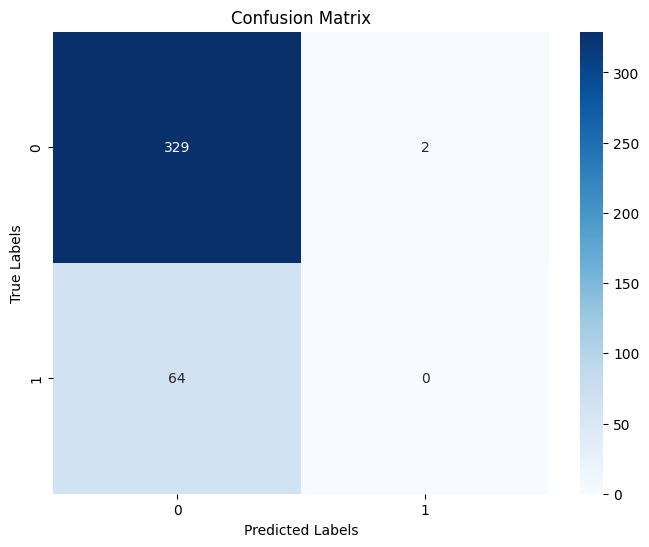

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       331
           1       0.00      0.00      0.00        64

    accuracy                           0.83       395
   macro avg       0.42      0.50      0.45       395
weighted avg       0.70      0.83      0.76       395



In [139]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print(classification_report(y_test, y_pred))

## LOGISTIC REGRESSION MODEL

Accuracy: 0.8379746835443038


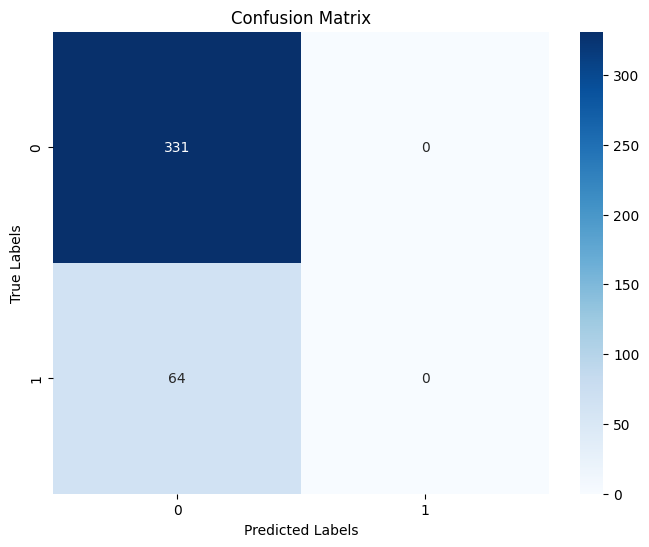

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       331
           1       1.00      0.00      0.00        64

    accuracy                           0.84       395
   macro avg       0.92      0.50      0.46       395
weighted avg       0.86      0.84      0.76       395



In [144]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print(classification_report(y_test, y_pred, zero_division=1))

## DEEP NEURAL NETWORK

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6994 - loss: 550.3131 - val_accuracy: 0.8228 - val_loss: 50.3402
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7517 - loss: 46.5446 - val_accuracy: 0.8259 - val_loss: 65.4973
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7260 - loss: 57.2093 - val_accuracy: 0.8228 - val_loss: 21.5092
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7222 - loss: 44.0971 - val_accuracy: 0.8259 - val_loss: 267.8190
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7601 - loss: 183.7213 - val_accuracy: 0.8259 - val_loss: 51.4511
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7099 - loss: 50.3463 - val_accuracy: 0.8259 - val_loss: 51.2845
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7287 - loss: 126.6184 - val_accuracy: 0.7152 - val_loss: 12.5491
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6969 - loss: 50.4785 - val_accura

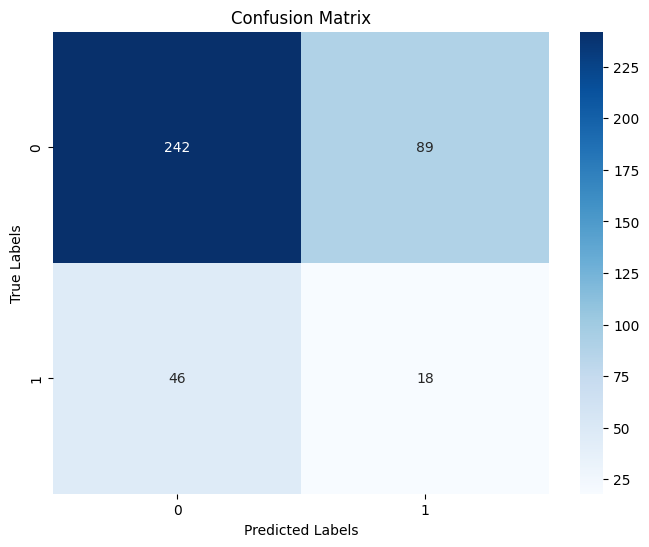

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       331
           1       0.17      0.28      0.21        64

    accuracy                           0.66       395
   macro avg       0.50      0.51      0.50       395
weighted avg       0.73      0.66      0.69       395



In [145]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print(classification_report(y_test, y_pred))


## SUPPORT VECTOR MACHINE (SVM)

Accuracy: 0.8379746835443038


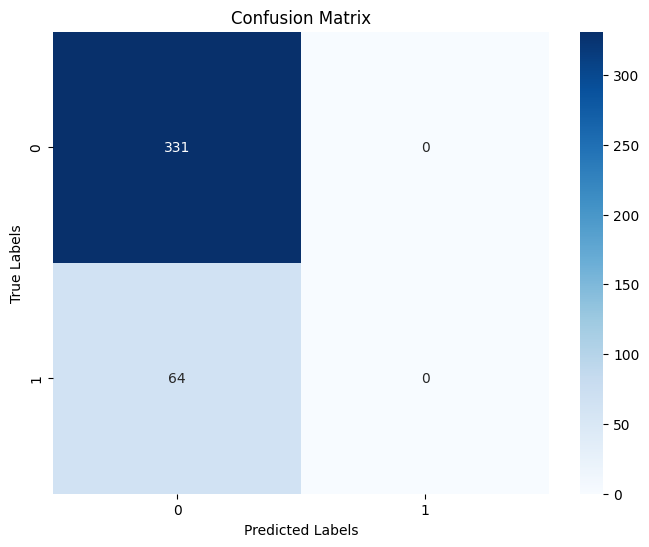

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       331
           1       1.00      0.00      0.00        64

    accuracy                           0.84       395
   macro avg       0.92      0.50      0.46       395
weighted avg       0.86      0.84      0.76       395



In [172]:
svm_model = SVC(kernel='linear', random_state=42,probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print(classification_report(y_test, y_pred,zero_division=1))


## ARTIFICIAL NEURAL NETWORK

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6147 - loss: 1648.2504 - val_accuracy: 0.8259 - val_loss: 238.6330
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7408 - loss: 128.7613 - val_accuracy: 0.8006 - val_loss: 30.7602
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7688 - loss: 30.4441 - val_accuracy: 0.8259 - val_loss: 42.0298
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7623 - loss: 31.0230 - val_accuracy: 0.8259 - val_loss: 32.3319
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7282 - loss: 27.0571 - val_accuracy: 0.7880 - val_loss: 16.3868
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6864 - loss: 75.0839 - val_accuracy: 0.8259 - val_loss: 66.2863
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7682 - loss: 48.0605 - val_accuracy: 0.3006 - val_loss: 25.6029
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7115 - loss: 37.3538 - val_accuracy

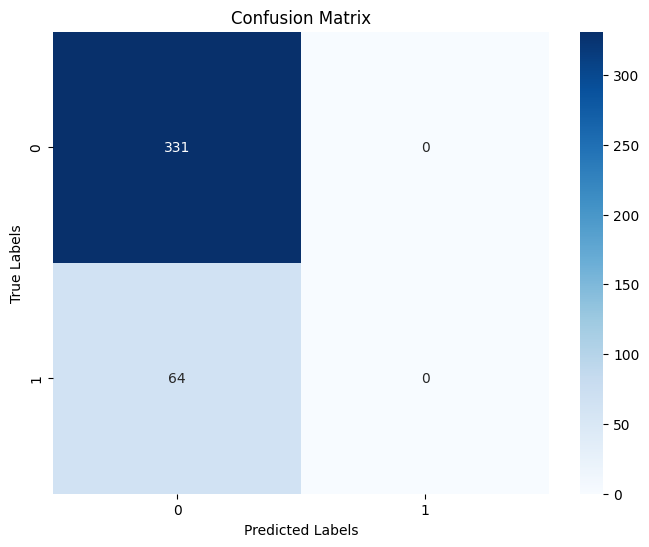

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       331
           1       1.00      0.00      0.00        64

    accuracy                           0.84       395
   macro avg       0.92      0.50      0.46       395
weighted avg       0.86      0.84      0.76       395



In [151]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print(classification_report(y_test, y_pred,zero_division=1))

## VISUALIZATION OF ALL THE MODELS

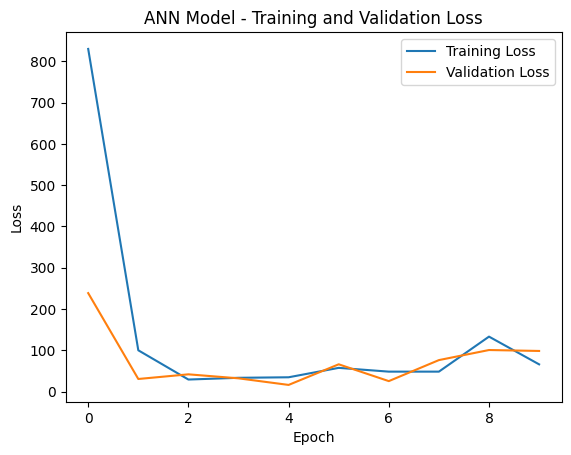

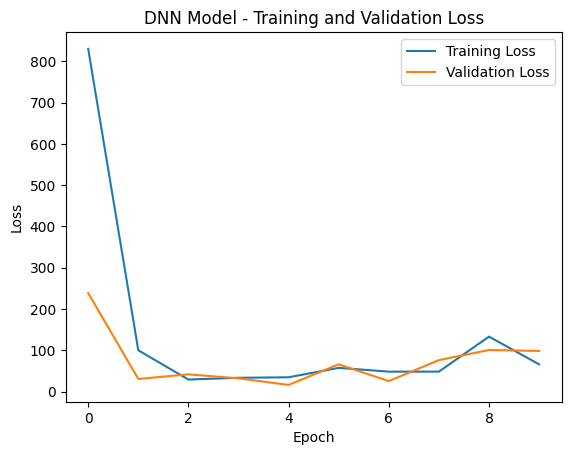

In [158]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


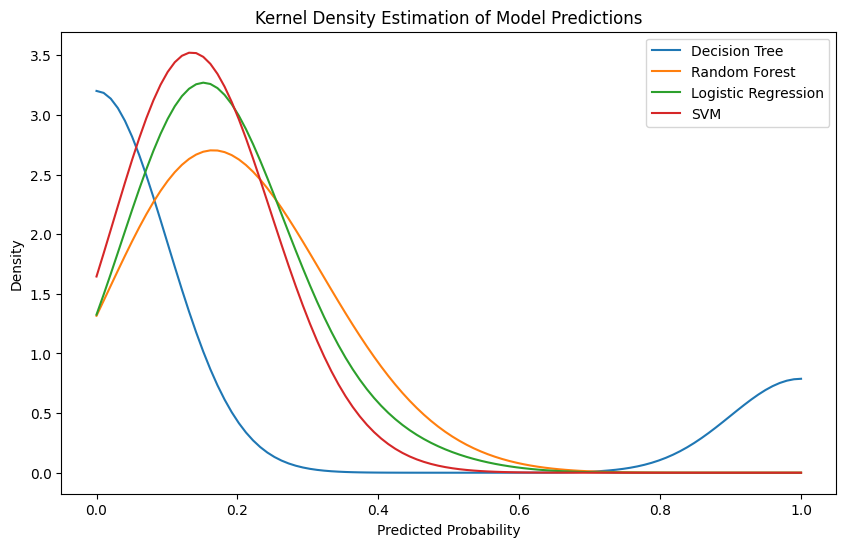

In [175]:
dt_pred_prob = dt_model.predict_proba(X_test)[:, 1]
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]
lr_pred_prob = lr_model.predict_proba(X_test)[:, 1]
svm_pred_prob = svm_model.predict_proba(X_test)[:, 1]
dt_kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(dt_pred_prob.reshape(-1, 1))
rf_kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(rf_pred_prob.reshape(-1, 1))
lr_kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(lr_pred_prob.reshape(-1, 1))
svm_kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(svm_pred_prob.reshape(-1, 1))
x = np.linspace(0, 1, 100)[:, np.newaxis]
dt_log_density = dt_kde.score_samples(x)
rf_log_density = rf_kde.score_samples(x)
lr_log_density = lr_kde.score_samples(x)
svm_log_density = svm_kde.score_samples(x)
plt.figure(figsize=(10, 6))
plt.plot(x, np.exp(dt_log_density), label='Decision Tree')
plt.plot(x, np.exp(rf_log_density), label='Random Forest')
plt.plot(x, np.exp(lr_log_density), label='Logistic Regression')
plt.plot(x, np.exp(svm_log_density), label='SVM')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Model Predictions')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


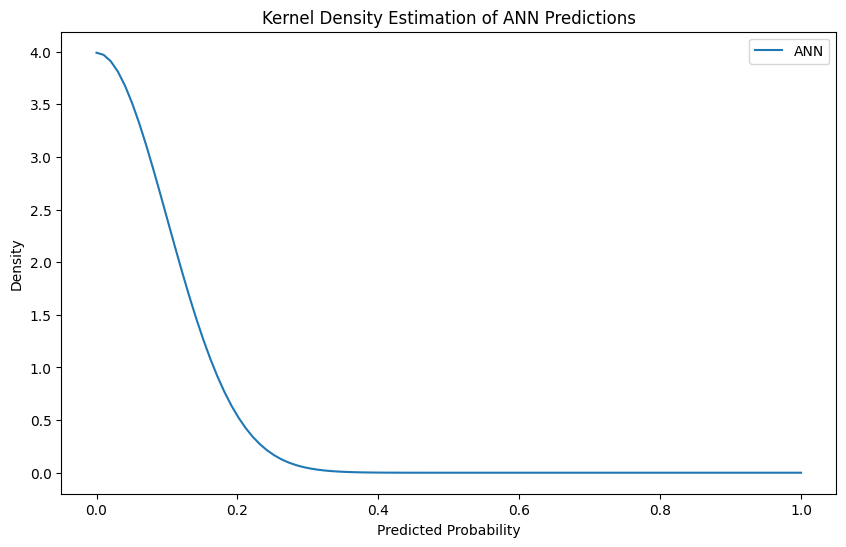

In [178]:
ann_pred_prob = model.predict(X_test)
ann_kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(ann_pred_prob.reshape(-1, 1))
x = np.linspace(0, 1, 100)[:, np.newaxis]
ann_log_density = ann_kde.score_samples(x)
plt.figure(figsize=(10, 6))
plt.plot(x, np.exp(ann_log_density), label='ANN')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of ANN Predictions')
plt.legend()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


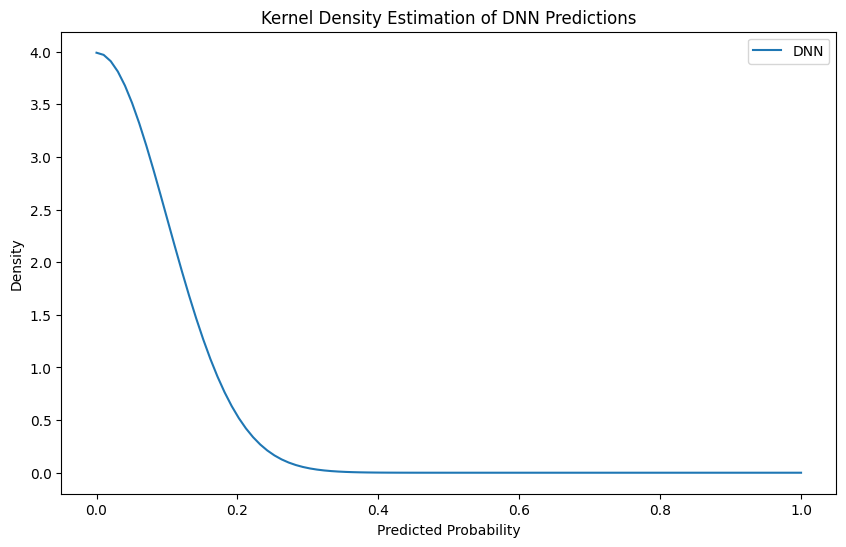

In [180]:
dnn_pred_prob = model.predict(X_test)
dnn_kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(dnn_pred_prob.reshape(-1, 1))
x = np.linspace(0, 1, 100)[:, np.newaxis]
dnn_log_density = dnn_kde.score_samples(x)
plt.figure(figsize=(10, 6))
plt.plot(x, np.exp(dnn_log_density), label='DNN')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of DNN Predictions')
plt.legend()
plt.show()


# CONCLUSION

In [160]:
print("Decision Tree - Training Accuracy:", dt_model.score(X_train, y_train))
print("Decision Tree - Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest - Training Accuracy:", rf_model.score(X_train, y_train))
print("Random Forest - Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression - Training Accuracy:", lr_model.score(X_train, y_train))
print("Logistic Regression - Testing Accuracy:", accuracy_score(y_test, y_pred))
print("SVM - Training Accuracy:", svm_model.score(X_train, y_train))
print("SVM - Testing Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.8379746835443038
Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.8379746835443038
Logistic Regression - Training Accuracy: 0.8322784810126582
Logistic Regression - Testing Accuracy: 0.8379746835443038
SVM - Training Accuracy: 0.8335443037974684
SVM - Testing Accuracy: 0.8379746835443038


In [169]:
loan_defaulters = df2['loan_default_indicator'].sum()
non_defaulters = len(df2) - loan_defaulters

print(f"Number of loan defaulters: {loan_defaulters}")
print(f"Number of non-defaulters: {non_defaulters}")


Number of loan defaulters: 327
Number of non-defaulters: 1648


Conclusion:
Based on the analysis of various models (Decision Tree, Random Forest, Logistic Regression, SVM, ANN, and DNN), it appears that the models with simpler architectures like Logistic Regression and SVM show better generalization performance compared to more complex models like Decision Trees and Random Forests. This suggests that the latter models might be overfitting to the training data.
Neural networks (ANN and DNN) can be effective, as it can bee seen from the kdplot for the neural networks they are identical in nature , Thus making them considerable in the project.